# Classification of Cats and Dogs Images by Transfer Learning

# Part I: Build the neural network


In [2]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torchvision.models as models
from torch import nn

data_dir = 'Cat_Dog_data'

train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
]) 

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16)

model = models.densenet121(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(in_features=1024, out_features=1000)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

c:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

# Part II: Train the neural network

Demo Output:
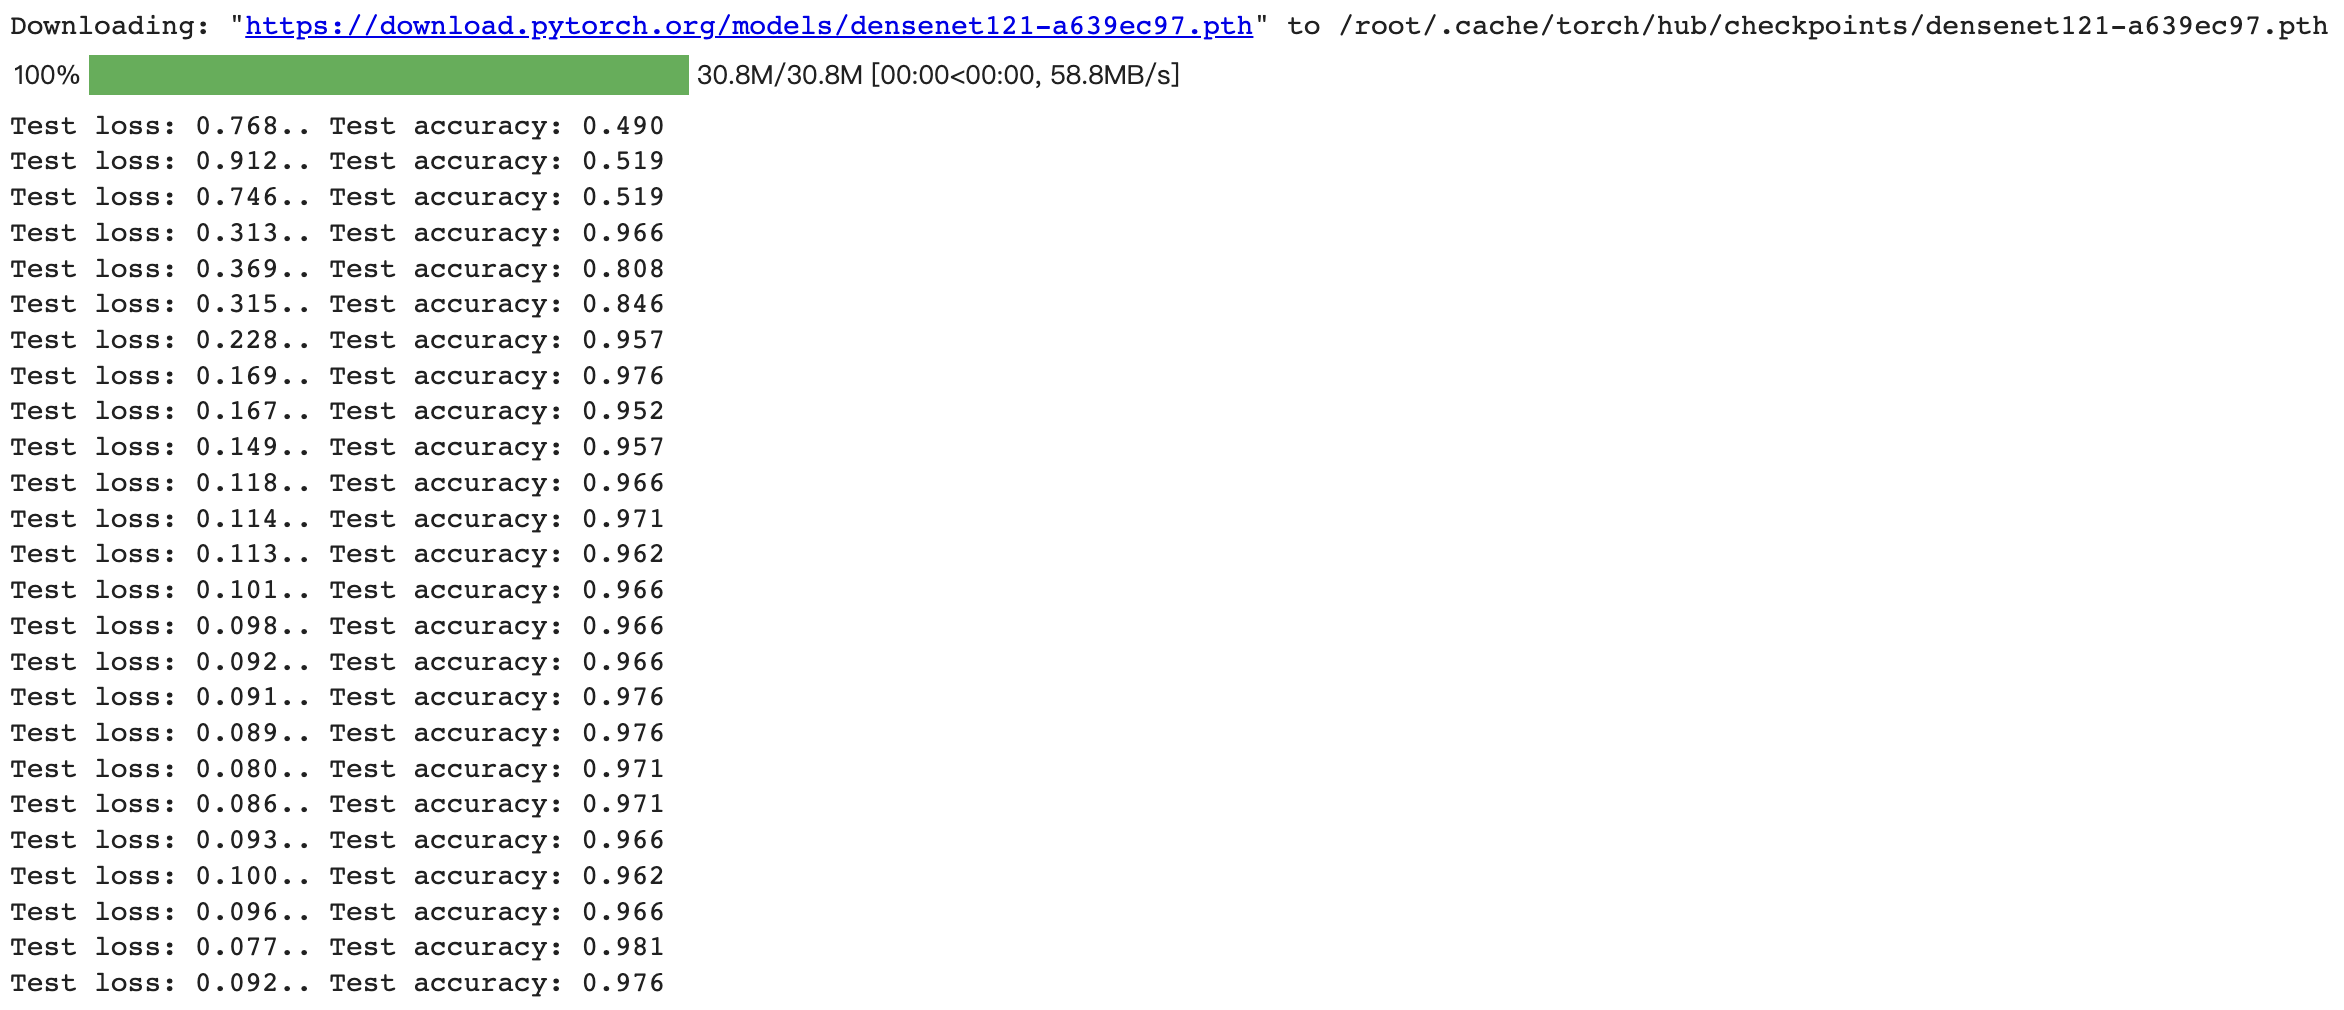

In [3]:
# Part II: Train the neural network
from torch import optim

# calculate loss
criterion = nn.CrossEntropyLoss()
# optimizer to reduce loss (lr = learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for e in range(num_epochs):
        # batch of 16 images and labels in each iteration
        for images, labels in trainloader:
                images, labels = images.to(device), labels.to(device)
                # to ensure that the gradients are not accumulated from previous iterations
                optimizer.zero_grad()

                output = model(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
        print(f"Epoch {e+1} completed.")

        test_loss = 0
        accuracy = 0
        model.eval()
        with torch.no_grad():
                for images, labels in testloader:
                        images, labels = images.to(device), labels.to(device)
                        logps = model(images)
                        batch_loss = criterion(logps, labels)
                        test_loss += batch_loss.item()
                        
                        ps = torch.exp(logps)
                        top_p, top_class = ps.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                
        print(f"Test loss: {test_loss/len(testloader):.3f}.. "
                f"Test accuracy: {accuracy/len(testloader):.3f}")
        model.train()

print("Training finished.")


Epoch 1 completed.
Test loss: 0.545.. Test accuracy: 0.832
Epoch 2 completed.
Test loss: 0.300.. Test accuracy: 0.952
Epoch 3 completed.
Test loss: 0.216.. Test accuracy: 0.957
Epoch 4 completed.
Test loss: 0.189.. Test accuracy: 0.957
Epoch 5 completed.
Test loss: 0.144.. Test accuracy: 0.966
Epoch 6 completed.
Test loss: 0.145.. Test accuracy: 0.952
Epoch 7 completed.
Test loss: 0.121.. Test accuracy: 0.962
Epoch 8 completed.
Test loss: 0.118.. Test accuracy: 0.971
Epoch 9 completed.
Test loss: 0.103.. Test accuracy: 0.971
Epoch 10 completed.
Test loss: 0.104.. Test accuracy: 0.976
Training finished.


In [10]:
from PIL import Image

# Load and preprocess the input image
image_path = 'catTest2.jpg'
image = Image.open(image_path)
image_tensor = test_transforms(image)
image_tensor = image_tensor.unsqueeze(0)  # Add an extra dimension for batch size

# Move the image tensor to the appropriate device
image_tensor = image_tensor.to(device)

# Perform inference on the image
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(image_tensor)

# Interpret the results
probabilities = torch.exp(output)
class_index = torch.argmax(probabilities, dim=1).item()
class_label = train_data.classes[class_index]

print(f"The image is classified as: {class_label}")

The image is classified as: cat


#Part III: Check the neural network

Demo Output:
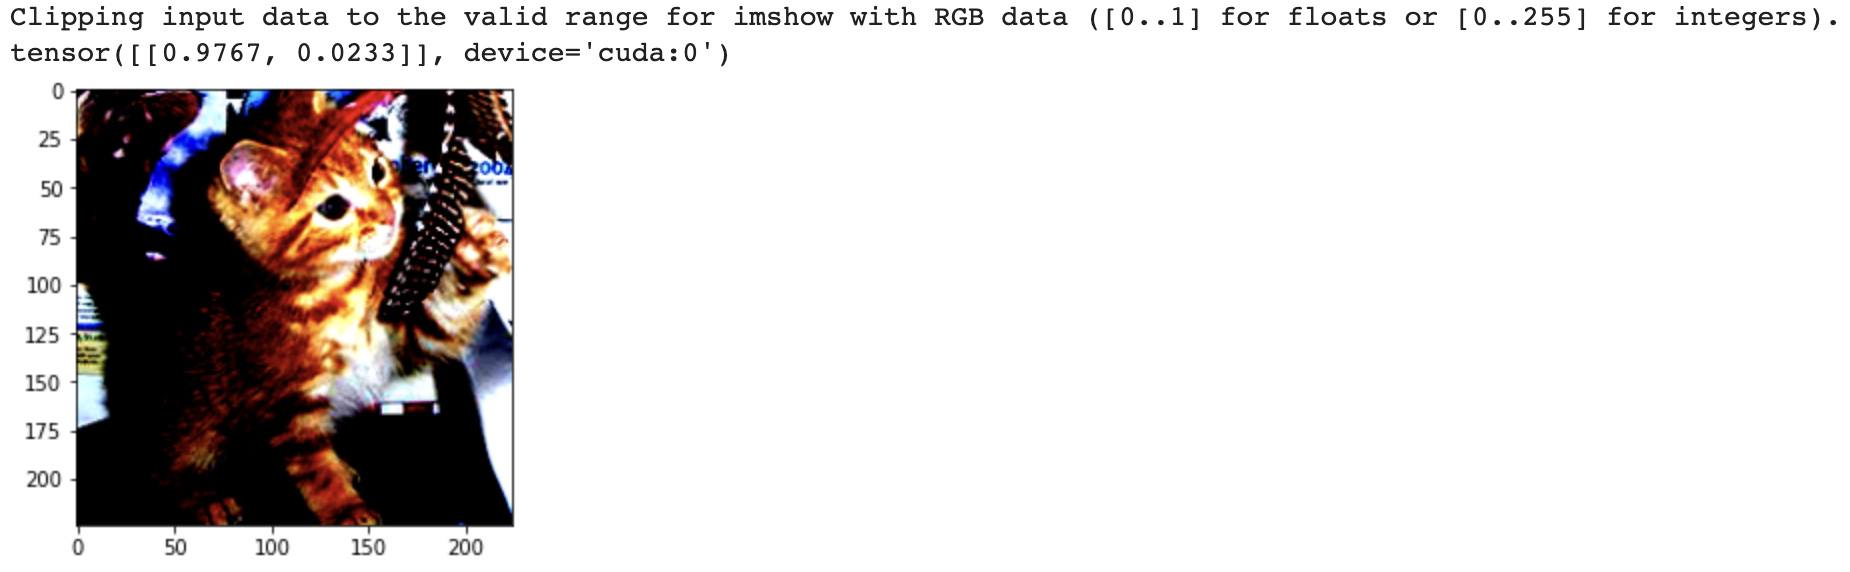

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[9.7067e+02, 1.3140e+02, 3.1909e-04, 5.8099e-04, 2.5514e-04, 2.7352e-04,
         7.9091e-04, 1.3877e-04, 6.7753e-04, 2.5179e-04, 2.3913e-04, 7.4284e-04,
         5.2559e-04, 1.0441e-03, 4.1763e-04, 5.2928e-04, 7.5631e-04, 3.1228e-04,
         3.3370e-04, 5.7528e-04, 9.2567e-04, 2.9550e-04, 4.6690e-04, 2.8401e-04,
         3.0308e-04, 9.0074e-04, 6.2766e-04, 6.4357e-04, 5.6024e-04, 5.1308e-04,
         3.5639e-04, 3.0930e-04, 5.4273e-04, 1.9382e-04, 3.5475e-04, 2.2610e-04,
         5.8348e-04, 2.7550e-04, 2.9611e-04, 4.1413e-04, 4.1698e-04, 4.4308e-04,
         2.5464e-04, 3.1552e-04, 1.8322e-04, 7.7529e-04, 2.5682e-04, 3.3838e-04,
         2.6401e-04, 4.1655e-04, 3.8455e-04, 2.6826e-04, 7.6994e-04, 5.3977e-04,
         3.5104e-04, 8.0681e-04, 6.3335e-04, 5.4852e-04, 4.1394e-04, 2.2649e-04,
         2.9841e-04, 9.7696e-04, 3.0774e-04, 3.6470e-04, 4.5732e-04, 6.6905e-04,
         8.4060e-04, 3.2729e-04, 3.7159e-04, 4.4403e-04, 4.2269e-04, 3.0164e-04,
         7.6038e-04, 3.2694e

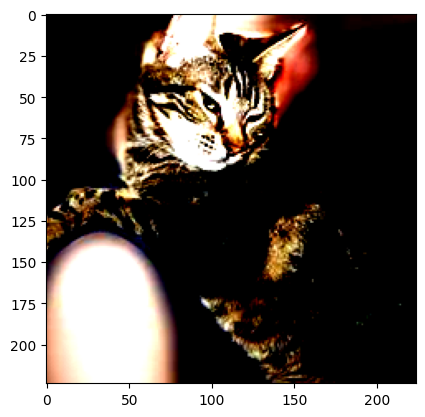

In [13]:
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))
img = images[3]
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs, labels = images.to(device), images.to(device)

model.eval()
with torch.no_grad():
  logits = model.forward(inputs[0].view(1, 3, 224, 224))
  print(torch.exp(logits))

probabilities = torch.exp(logits)
class_index = torch.argmax(probabilities, dim=1).item()
class_label = train_data.classes[class_index]

print(f"The image is classified as: {class_label}")